# Case Study Unit 14: Analyzing Airline Flight Delays

Juhee Dalal

MSDS 7333: Quantifying the World, 4/20/17

## INTRODUCTION

When traveling, flying to your destination is usually the shortest route but not necessarily the shortest travel time. By the time one parks the car, checks bags in, goes through security, finds their gate, they have already added more than an hour to their travel time. Now what if their flight is delayed because of weather or a mechanical issue or simply because the pilot forgot to show up. Unfortunately there are more delayed flights than you might think. Is there a way to determine which airports have the most delays? Or is there a way to predict how long a particular flight is going to be delayed? These are the questions we are going to dive into with this case study.  

## BACKGROUND

The answer to these questions are in the 2009 “Airline On-Time Performance” data set which was posted on the Bureau of Transportation Research and Innovative Technology Administration (RITA) website. This data contains information on all delayed flights from October 1987 to April 2008. There is roughly 12 gigabytes worth of data from the 120 million flights and each of their 29 variables. Some of these variables pertain to the specific flight such as date and time, carrier, airtime, destination, and departure time. While others pertain to the delay like delay type and cancellation code. To handle such a big dataset can be time consuming and computationally expensive. We will be using several techniques to ensure the exploratory analysis, data wrangling, and calculation steps are run efficiently as possible. Even after all of the loading techniques the analysis required to answers the questions still takes time to run. Overall our code is mostly in Python because it was more efficient for the tasks we wanted to accomplish. 

### Data Set Description

The variables in the data set are listed below:

1. 	Year: 1987-2008
2. 	Month: 1-12
3. 	DayofMonth: 1-31
4. 	DayOfWeek: 1 (Monday) - 7 (Sunday)
5. 	DepTime: actual departure time (local, hhmm)
6. 	CRSDepTime: scheduled departure time (local, hhmm)
7. 	ArrTime: actual arrival time (local, hhmm)
8. 	CRSArrTime: scheduled arrival time (local, hhmm)
9. 	UniqueCarrier: unique carrier code
10. FlightNum: flight number
11. TailNum: plane tail number
12. ActualElapsedTime: in minutes
13. CRSElapsedTime: in minutes
14. AirTime: in minutes
15. ArrDelay: arrival delay, in minutes
16. DepDelay: departure delay, in minutes
17. Origin: origin IATA airport code
18. Dest: destination IATA airport code
19. Distance: in miles
20. TaxiIn: taxi in time, in minutes
21. TaxiOut: taxi out time in minutes
22. Cancelled: was the flight cancelled?
23. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted: 1 = yes, 0 = no
25. CarrierDelay: in minutes
26. WeatherDelay: in minutes
27. NASDelay: in minutes
28. SecurityDelay: in minutes
29. LateAircraftDelay: in minutes

We will begin by downloading the data set using Python and loading it in to the memory.

## METHODS

### Creating the Data Folder

The block of code below creates the data directory to store all of our data files.

In [1]:
import os, sys

path = "Data"
if not os.path.exists(path):
    os.mkdir(path, 0755)

### Downloading the Data files

The data is web hosted at stat-computing.org and we created a script to generate http requests and save the resulting files in a certain naming format. The file names are saved with the extension .csv.bz2 as compressed files. 

In [2]:
import urllib

years_to_download = range(1987, 2009)
baseurl = 'http://stat-computing.org/dataexpo/2009/%d.csv.bz2'

files = []

for year in years_to_download:
    # prepare file strings
    url_of_data_file = baseurl%year
    save_as_filename = 'Data/%d.csv.bz2'%(year)
    files += [save_as_filename]
        
    #download files
    print 'Downloading %s to %s' %(url_of_data_file, save_as_filename)
    urllib.urlretrieve(url_of_data_file, save_as_filename)
    
print files

['Data/1987.csv.bz2', 'Data/1988.csv.bz2', 'Data/1989.csv.bz2', 'Data/1990.csv.bz2', 'Data/1991.csv.bz2', 'Data/1992.csv.bz2', 'Data/1993.csv.bz2', 'Data/1994.csv.bz2', 'Data/1995.csv.bz2', 'Data/1996.csv.bz2', 'Data/1997.csv.bz2', 'Data/1998.csv.bz2', 'Data/1999.csv.bz2', 'Data/2000.csv.bz2', 'Data/2001.csv.bz2', 'Data/2002.csv.bz2', 'Data/2003.csv.bz2', 'Data/2004.csv.bz2', 'Data/2005.csv.bz2', 'Data/2006.csv.bz2', 'Data/2007.csv.bz2', 'Data/2008.csv.bz2']


### Decompressing the Data Files

The data is grouped into CSV files by year. On the website they are stored compressed to conserve storage and bandwidth costs so once the files were downloaded they had to be decompressed.

In [5]:
import bz2

for filename in files:
    filepath = filename
    newfilepath = filename[:-4]
    print 'Decompressing', filepath, 'to', newfilepath
    
    with open(newfilepath, 'wb') as newfile, bz2.BZ2File(filepath, 'rb') as file:
        for data in iter(lambda : file .read(100 * 1024), b''):
            newfile.write(data)

Decompressing Data/1987.csv.bz2 to Data/1987.csv
Decompressing Data/1988.csv.bz2 to Data/1988.csv
Decompressing Data/1989.csv.bz2 to Data/1989.csv
Decompressing Data/1990.csv.bz2 to Data/1990.csv
Decompressing Data/1991.csv.bz2 to Data/1991.csv
Decompressing Data/1992.csv.bz2 to Data/1992.csv
Decompressing Data/1993.csv.bz2 to Data/1993.csv
Decompressing Data/1994.csv.bz2 to Data/1994.csv
Decompressing Data/1995.csv.bz2 to Data/1995.csv
Decompressing Data/1996.csv.bz2 to Data/1996.csv
Decompressing Data/1997.csv.bz2 to Data/1997.csv
Decompressing Data/1998.csv.bz2 to Data/1998.csv
Decompressing Data/1999.csv.bz2 to Data/1999.csv
Decompressing Data/2000.csv.bz2 to Data/2000.csv
Decompressing Data/2001.csv.bz2 to Data/2001.csv
Decompressing Data/2002.csv.bz2 to Data/2002.csv
Decompressing Data/2003.csv.bz2 to Data/2003.csv
Decompressing Data/2004.csv.bz2 to Data/2004.csv
Decompressing Data/2005.csv.bz2 to Data/2005.csv
Decompressing Data/2006.csv.bz2 to Data/2006.csv
Decompressing Data/2

### Removing the Compressed Files

Here we are double-checking to make sure all the compressed files are deleted.

In [6]:
!rm Data/*.bz2

rm: Data/.bz2: No such file or directory


### Loading Data into Memory

Here we are previewing two years worth of data to see what we are working with. For these two years there are over six million observations. We are taking the decompressed files and reading them in. They are being saved into a new data frame and the number of lines is counted to give us an idea of how much data is in just these two files. A preview of the data frame is printed below along with the size. Next, we are printing the 1987 csv file in its raw format to see what needs to be changed.

In [1]:
import pandas as pd
import numpy as np
import sys

total_length = 0
for year in [1987, 1988]:
    csvfile = 'Data/%d.csv'%(year)
    print 'Loading', csvfile
    sys.stdout.flush()
    
    df = pd.read_csv(csvfile)
    total_length += len(df)

print 'Answer from Python:', total_length
df.head()

Loading Data/1987.csv
Loading Data/1988.csv
Answer from Python: 6513922


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1988,1,9,6,1348,1331,1458,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1988,1,10,7,1334,1331,1443,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1988,1,11,1,1446,1331,1553,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1988,1,12,2,1334,1331,1438,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1988,1,13,3,1341,1331,1503,1435,PI,942,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
print 'CSV File Format'
!head Data/1987.csv

CSV File Format
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,NA,23,11,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,NA,14,-1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,NA,29,11,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,NA,-2,-1,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,NA,33,19,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,NA,-1,-2,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,NA,3,-2,SAN,SFO,447,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1987,10,23,5,731,730

Our next task is to get all of the entries from 1987 to 2008 into one giant data frame. Since Python is much more effiencient at loading the data, we will use it to preprocess the csv files. We have to make sure that all the data is in integer form. The text must be coded as an integer to use R's bigmemory package.

###  Preprocessing Data in Chunks

In order to use R with python rpy2 needs to be installed and loaded.

In [4]:
import rpy2
%load_ext rmagic 
%load_ext rpy2.ipython

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


To get some simple statistics, counts, and unique values from a data set this large we have to preprocess all of the data in chunks to increase efficiency. Here we are loading all the CSVs into a pandas Data Frame and finding unique values using pickle. 

In [8]:
import pandas as pd
import numpy as np
import sys
import time
import cPickle as pickle

unique_values = {}
for year in range(1987,2009):
    t = time.time()
    
    # Get Name of the File
    csvfile = 'Data/%d.csv'%(year)
    print 'Loading',csvfile,
    sys.stdout.flush()
    
    # Read File
    df = pd.read_csv(csvfile, usecols=['Origin','Dest','UniqueCarrier','TailNum','CancellationCode'])
    
    print '...Finding Unique Values',
    sys.stdout.flush()
    
    for col in df.columns:
        s = set(df[col].values.astype(np.str))
        if col not in unique_values:
            unique_values[col] = s

        else:
            unique_values[col] |= s
            
    print '...Finished, %.2f seconds' %(time.time() - t)
    sys.stdout.flush()
    del df
    
pickle.dump(unique_values, open("Data/unique_mapping.p", "wb"))
    

 Loading Data/1987.csv ... Finding Unique Values ... Finished, 3.89 seconds
Loading Data/1988.csv ... Finding Unique Values ... Finished, 17.67 seconds
Loading Data/1989.csv ... Finding Unique Values ... Finished, 18.79 seconds
Loading Data/1990.csv ... Finding Unique Values ... Finished, 21.95 seconds
Loading Data/1991.csv ... Finding Unique Values ... Finished, 23.38 seconds
Loading Data/1992.csv ... Finding Unique Values ... Finished, 23.16 seconds
Loading Data/1993.csv ... Finding Unique Values ... Finished, 18.92 seconds
Loading Data/1994.csv ... Finding Unique Values ... Finished, 18.45 seconds
Loading Data/1995.csv ... Finding Unique Values ... Finished, 19.05 seconds
Loading Data/1996.csv ... Finding Unique Values ... Finished, 19.35 seconds
Loading Data/1997.csv ... Finding Unique Values ... Finished, 19.45 seconds
Loading Data/1998.csv ... Finding Unique Values ... Finished, 19.11 seconds
Loading Data/1999.csv ... Finding Unique Values ... Finished, 19.41 seconds
Loading Data

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Here is a sample of a unique key-value pair.

In [9]:
print unique_values.keys()
print 'One Example:', unique_values['CancellationCode']

['Origin', 'TailNum', 'UniqueCarrier', 'Dest', 'CancellationCode']
One Example: set(['A', 'C', 'B', 'D', 'nan'])


The creation of fast_numpy_replace allows us to turn location features into numeric categorical variables. This process, although straightforward, took roughly 17 minutes to fully complete due to the sheer number of observations. 

In [17]:
def fast_numpy_replace (np_vector, replace_set):
    replace_set = np.array(list(replace_set))
    n = np.ndarray(np_vector.shape).astype(np.float64)
    
    vector_as_set, idx_back = np.unique(np_vector, return_inverse = True)
    
    for idx, val in enumerate(vector_as_set):
        category_num = np.nonzero(replace_set == val)[0][0]
        n[idx_back == idx] = category_num
        
    return n.astype(np.float64)


fileHandle = open('Data/AirlineDataAll.csv', 'w')
years = range(1987, 2009)

for year in years:
    t = time.time()
    
    csvfile = 'Data/%d.csv'%(year)
    print 'Running...',csvfile,
    sys.stdout.flush()
    
    # Read File
    df = pd.read_csv(csvfile)
    
    print 'Loaded, ...Replacing Values',
    sys.stdout.flush()
    
    for key in unique_values.keys():
        if key in df:
            print key[0:4],
            sys.stdout.flush()
            tmp = df[key].values.astype(np.str)
            df[key] = fast_numpy_replace(tmp, unique_values[key])
    
    print '...',
    sys.stdout.flush()
    
    for col in df:
        df[col] = np.round(df[col].astype(np.float64))
    
    print 'Writing',
    sys.stdout.flush()
    
    if year == years[0]:
        df.to_csv(fileHandle, index=False, index_label=False, na_rep="NA", float_format='%.0f')
    else:
        df.to_csv(fileHandle, mode='a', index=False, index_label=False, na_rep="NA", float_format='%.0f')
    
    print ', %.2f sec.' %(time.time() - t)
    sys.stdout.flush()
    del df
   
print 'Closing File',
sys.stdout.flush()

fileHandle.close()
print '...Done'
sys.stdout.flush()

 Running... Data/1987.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 44.31 sec.
Running... Data/1988.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 164.83 sec.
Running... Data/1989.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 173.91 sec.
Running... Data/1990.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 191.54 sec.
Running... Data/1991.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 188.14 sec.
Running... Data/1992.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 207.76 sec.
Running... Data/1993.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 493.02 sec.
Running... Data/1994.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 209.71 sec.
Running... Data/1995.csv Loaded, ...Replacing Values Orig Tail Uniq Dest Canc ... Writing , 273.62 sec.
Running... Data/1996.csv Loaded, ...Replacing Values Orig Tail U

### File Format Comparison

Below is a comparison of the old file format and the file that has been processed by fast_numpy_replace function. 

In [18]:
print 'New File Format:'
!head Data/AirlineDataAll.csv

print ''
print 'Old File Format:'
!head Data/1987.csv

New File Format:
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1987,10,14,3,741,730,912,849,7,1451,9719,91,79,NA,23,11,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,15,4,729,730,903,849,7,1451,9719,94,79,NA,14,-1,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,17,6,741,730,918,849,7,1451,9719,97,79,NA,29,11,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,18,7,729,730,847,849,7,1451,9719,78,79,NA,-2,-1,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,19,1,749,730,922,849,7,1451,9719,93,79,NA,33,19,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,21,3,728,730,848,849,7,1451,9719,80,79,NA,-1,-2,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,22,4,728,730,852,849,7,1451,9719,84,79,NA,3,-2,172,202,447,NA,NA,0,4,0,NA,NA,NA,NA,NA
1987,10,23,5,731,73

In [19]:
print 'New File Format:'
!tail Data/AirlineDataAll.csv

print ''
print 'Old File Format:'
!tail Data/2008.csv

New File Format:
2008,12,13,6,1007,847,1149,1010,0,1631,2497,162,143,122,99,80,251,20,689,8,32,0,4,0,1,0,19,0,79
2008,12,13,6,638,640,808,753,0,1632,10676,90,73,50,15,-2,130,255,270,14,26,0,4,0,0,0,15,0,0
2008,12,13,6,756,800,1032,1026,0,1633,959,96,86,56,6,-4,304,255,425,23,17,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,612,615,923,907,0,1635,2826,131,112,103,16,-3,53,272,546,5,23,0,4,0,0,0,16,0,0
2008,12,13,6,749,750,901,859,0,1636,9994,72,69,41,2,-1,180,255,215,20,11,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1002,959,1204,1150,0,1636,9994,122,111,71,14,3,251,21,533,6,45,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,834,835,1021,1023,0,1637,10045,167,168,139,-2,-1,251,185,874,5,23,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,655,700,856,856,0,1638,12867,121,116,85,0,-5,235,255,545,24,12,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1251,1240,1446,1437,0,1639,9994,115,117,89,9,11,21,255,533,13,13,0,4,0,NA,NA,NA,NA,NA
2008,12,13,6,1110,1103,1413,1418,0,1641,10045,123,135,104,-5,7,181,255,874,8,11,0,4,0,NA,NA,NA,NA,NA

Old File Format:
20

Here we save the modified versions of all year CSVs into a single file called AirlineDataAll.csv.
This concludes the preprocessing part of the analysis, now we jump to R to begin analysis. 


In [20]:
!ls -all Data/*All.csv

-rw-r--r--  1 adamsoto  staff  11785524726 Apr  2 12:06 Data/AirlineDataAll.csv


### Load the Data in R

With R we use a library called bigmemory to assist in running calculations efficiently. The conversion of the CSV file to bigmemory’s matrix is one of the first expensive steps computing wise, it takes roughly an hour and half for the whole dataset to convert. 

In [9]:
%%R
library(bigmemory)

In [11]:
%%R

x <- read.big.matrix("Data/AirlineDataAll.csv", header=TRUE, backingpath="Data", 
                     backingfile="airline.bin", descriptorfile="airline.desc", type="integer", extraCols="age")

print (dim(x))

[1] 123534990        30


In [12]:
!ls -all Data/*.bin

-rw-r--r--  1 adamsoto  staff  14824198801 Apr  9 12:29 Data/airline.bin


##### Only Run The Above Code Once: ~ 1.5hrs to Complete

### Loading Data in Python

To see if there is a more efficient method of analysis we jump to using graphlab in Python. 

In [2]:
import graphlab as gl

The dataset was parsed and loaded into an sFrame which took roughly 14 minutes to complete. Python is definitely much more efficient at this than R. It also handles the out-of-core memory management automatically. This means that loading and saving large data sets will be much faster. Parallelization is handled as well in the background. However, the split-apply-combine technique has less flexibility. The functions that are already built in will be used for aggregation. Grouping and applying also cannot be separated. The line of code below is saving all of the data from the consolidated csv file to an SFrame. Notice that we are able to see all of the data loaded into the SFrame. The dimensions of the SFrame below indicate this.

In [3]:
sf = gl.SFrame('Data/AirlineDataAll.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1491964106.log


This non-commercial license of GraphLab Create for academic use is assigned to ajsoto@smu.edu and will expire on April 09, 2018.


Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/AirlineDataAll.csv

Parsing completed. Parsed 100 lines in 1.55688 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,int,int,int,int,int,int,int,str,int,int,int,int,int,str,str,int,int,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 541148 lines. Lines per second: 188089

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 2719286 lines. Lines per second: 307600

Read 4903423 lines. Lines per second: 333100

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 7071433 lines. Lines per second: 337203

Read 8707725 lines. Lines per second: 331687

Read 10342975 lines. Lines per second: 324698

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 11965507 lines. Lines per second: 317593

Read 13600288 lines. Lines per second: 310011

Read 15234051 lines. Lines per second: 302710

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 16852970 lines. Lines per second: 295778

Read 18485775 lines. Lines per second: 287918

Read 20120136 lines. Lines per second: 283643

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 21741449 lines. Lines per second: 279602

Read 23371979 lines. Lines per second: 275720

Read 25006126 lines. Lines per second: 271530

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 26628970 lines. Lines per second: 267755

Read 27712814 lines. Lines per second: 265352

Read 28800569 lines. Lines per second: 263103

Read 29887867 lines. Lines per second: 259918

Read 30973504 lines. Lines per second: 257178

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 32048892 lines. Lines per second: 254285

Read 33136473 lines. Lines per second: 251651

Read 34222639 lines. Lines per second: 249253

Read 35310891 lines. Lines per second: 246447

Read 36392610 lines. Lines per second: 243939

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 37471109 lines. Lines per second: 242029

Read 38566383 lines. Lines per second: 240713

Read 39660414 lines. Lines per second: 239462

Read 40755337 lines. Lines per second: 238406

Read 41844308 lines. Lines per second: 237480

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 42935514 lines. Lines per second: 236727

Read 44029579 lines. Lines per second: 236108

Read 45121708 lines. Lines per second: 235470

Read 46214902 lines. Lines per second: 235052

Read 47299060 lines. Lines per second: 234440

Unable to parse line "Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDel..."

Read 48389820 lines. Lines per second: 233816

Read 49480806 lines. Lines per second: 233223

Read 50572942 lines. Lines per second: 232679

Read 51664872 lines. Lines per second: 232200

Read 52747222 lines. Lines per second: 231714

Read 53838520 lines. Lines per second: 231318

Read 54928009 lines. Lines per second: 230704

Read 56019634 lines. Lines per second: 230299

Read 57110528 lines. Lines per second: 229783

Read 58191370 lines. Lines per second: 229421

Read 59276849 lines. Lines per second: 228977

Read 60368391 lines. Lines per second: 228509

Read 61460760 lines. Lines per second: 228006

Read 62549483 lines. Lines per second: 227525

Read 63633671 lines. Lines per second: 227001

Read 64716648 lines. Lines per second: 226538

Read 65804273 lines. Lines per second: 226101

Read 66891642 lines. Lines per second: 225611

Read 67979403 lines. Lines per second: 225249

Read 69060558 lines. Lines per second: 224681

Read 70140870 lines. Lines per second: 224248

Read 71227922 lines. Lines per second: 223857

Read 72314683 lines. Lines per second: 223525

Read 73401940 lines. Lines per second: 223012

Read 74491367 lines. Lines per second: 222728

Read 75570198 lines. Lines per second: 222291

Read 76651060 lines. Lines per second: 221821

Read 77736049 lines. Lines per second: 220938

Read 78818830 lines. Lines per second: 220415

Read 79900093 lines. Lines per second: 220104

Read 80973183 lines. Lines per second: 219710

Read 82055186 lines. Lines per second: 219419

Read 83139465 lines. Lines per second: 219149

Read 84243234 lines. Lines per second: 218900

Read 85382983 lines. Lines per second: 218698

Read 86517345 lines. Lines per second: 218449

Read 87645039 lines. Lines per second: 218325

Read 88784355 lines. Lines per second: 218212

Read 89923761 lines. Lines per second: 217982

Read 91063222 lines. Lines per second: 217832

Read 92203863 lines. Lines per second: 217702

Read 93340477 lines. Lines per second: 217529

Read 94468666 lines. Lines per second: 217491

Read 95604830 lines. Lines per second: 216834

Read 96744057 lines. Lines per second: 216242

Read 97883499 lines. Lines per second: 215867

Read 99019793 lines. Lines per second: 215470

Read 100159665 lines. Lines per second: 215064

Read 101287343 lines. Lines per second: 214678

Read 102418239 lines. Lines per second: 214205

Read 103555764 lines. Lines per second: 213752

Read 104694567 lines. Lines per second: 213368

Read 105832720 lines. Lines per second: 212967

Read 106969553 lines. Lines per second: 212543

Read 108097393 lines. Lines per second: 212182

Read 109223905 lines. Lines per second: 211772

Read 110360838 lines. Lines per second: 211415

Read 111495836 lines. Lines per second: 211051

Read 112634777 lines. Lines per second: 210912

Read 113771311 lines. Lines per second: 210603

Read 114905566 lines. Lines per second: 210531

Read 116029426 lines. Lines per second: 210380

Read 117132073 lines. Lines per second: 210125

Read 118224170 lines. Lines per second: 209827

Read 119314042 lines. Lines per second: 209469

Read 120404143 lines. Lines per second: 209107

Read 121492662 lines. Lines per second: 208774

Read 122571118 lines. Lines per second: 208440

21 lines failed to parse correctly

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/AirlineDataAll.csv

Parsing completed. Parsed 123534969 lines in 592.23 secs.

In [4]:
sf.shape

(123534969, 29)

Here, we are loading in the data again, but ensuring that the data types are all consistent. If they are not specified, graphlab will try to guess the appropriate type. The load_frame function is used to load the data correctly.

In [5]:
import os, sys
import time

#del sf

column_hints = [int,int,int,int,int,int,int,int,str,int,str,int,int,int,int,int,str,str,int,int,int,int,str,int,int,int,int,int,int]

t = time.time()
sf = gl.SFrame()

for year in range(1987, 2009):
    print 'Read %d lines, Reading next file %d.csv'%(sf.shape[0], year)
    sys.stdout.flush()
    sftmp = gl.SFrame.read_csv('Data/%d.csv'%(year), column_type_hints=column_hints)
    sf = sf.append(sftmp)
    
print 'It took %.2f seconds to concatenate the memory mapped file'%(time.time()-t)

t = time.time()
print 'Saving...',
sf.save('Data/sframe_directory')
print 'took %.2f seconds'%(time.time()-t), 'Shape of the SFrame is', sf.shape

Read 0 lines, Reading next file 1987.csv


Read 540959 lines. Lines per second: 156408

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1987.csv

Parsing completed. Parsed 1311826 lines in 4.78955 secs.

Read 1311826 lines, Reading next file 1988.csv


Read 546089 lines. Lines per second: 155239

Read 2184442 lines. Lines per second: 236662

Read 3821852 lines. Lines per second: 238637

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1988.csv

Parsing completed. Parsed 5202096 lines in 20.8464 secs.

Read 6513922 lines, Reading next file 1989.csv


Read 545019 lines. Lines per second: 97934.6

Read 1634745 lines. Lines per second: 147508

Read 2724002 lines. Lines per second: 162983

Read 3813071 lines. Lines per second: 171388

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1989.csv

Parsing completed. Parsed 5041200 lines in 27.1497 secs.

Read 11555122 lines, Reading next file 1990.csv


Read 545116 lines. Lines per second: 88466.5

Read 1633416 lines. Lines per second: 131190

Read 2722223 lines. Lines per second: 145208

Read 3810010 lines. Lines per second: 155330

Read 4888265 lines. Lines per second: 163778

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1990.csv

Parsing completed. Parsed 5270893 lines in 30.7301 secs.

Read 16826015 lines, Reading next file 1991.csv


Read 543797 lines. Lines per second: 92673.6

Read 1629277 lines. Lines per second: 132202

Read 2715831 lines. Lines per second: 141324

Read 3802465 lines. Lines per second: 145632

Read 4878544 lines. Lines per second: 155994

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1991.csv

Parsing completed. Parsed 5076925 lines in 31.7914 secs.

Read 21902940 lines, Reading next file 1992.csv


Read 544035 lines. Lines per second: 95909.7

Read 1630887 lines. Lines per second: 141501

Read 2718958 lines. Lines per second: 156218

Read 3806600 lines. Lines per second: 164362

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1992.csv

Parsing completed. Parsed 5092157 lines in 28.1739 secs.

Read 26995097 lines, Reading next file 1993.csv


Read 543425 lines. Lines per second: 93138.9

Read 1629801 lines. Lines per second: 143930

Read 2716517 lines. Lines per second: 155700

Read 3802121 lines. Lines per second: 160237

Read 4877507 lines. Lines per second: 167859

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1993.csv

Parsing completed. Parsed 5070501 lines in 29.5811 secs.

Read 32065598 lines, Reading next file 1994.csv


Read 543673 lines. Lines per second: 91103.8

Read 1628947 lines. Lines per second: 130103

Read 2715338 lines. Lines per second: 142468

Read 3801247 lines. Lines per second: 147971

Read 4876680 lines. Lines per second: 155371

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1994.csv

Parsing completed. Parsed 5180048 lines in 32.294 secs.

Read 37245646 lines, Reading next file 1995.csv


Read 527246 lines. Lines per second: 85228.6

Read 1581674 lines. Lines per second: 124843

Read 2635922 lines. Lines per second: 137097

Read 3692144 lines. Lines per second: 143418

Read 4739268 lines. Lines per second: 147298

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1995.csv

Parsing completed. Parsed 5327435 lines in 34.2544 secs.

Read 42573081 lines, Reading next file 1996.csv


Read 530202 lines. Lines per second: 93192.4

Read 1582656 lines. Lines per second: 134392

Read 2636325 lines. Lines per second: 146704

Read 3689352 lines. Lines per second: 153473

Read 4733913 lines. Lines per second: 156741

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1996.csv

Parsing completed. Parsed 5351983 lines in 32.5205 secs.

Read 47925064 lines, Reading next file 1997.csv


Read 529207 lines. Lines per second: 95064.3

Read 1580674 lines. Lines per second: 135776

Read 2632920 lines. Lines per second: 144492

Read 3684987 lines. Lines per second: 151284

Read 4729684 lines. Lines per second: 149739

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1997.csv

Parsing completed. Parsed 5411843 lines in 34.2324 secs.

Read 53336907 lines, Reading next file 1998.csv


Read 528414 lines. Lines per second: 94672.6

Read 1578601 lines. Lines per second: 134359

Read 2629594 lines. Lines per second: 145810

Read 3680636 lines. Lines per second: 150883

Read 4724179 lines. Lines per second: 154342

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1998.csv

Parsing completed. Parsed 5384721 lines in 33.1917 secs.

Read 58721628 lines, Reading next file 1999.csv


Read 524911 lines. Lines per second: 90091.3

Read 1577278 lines. Lines per second: 129896

Read 2627946 lines. Lines per second: 141256

Read 3677577 lines. Lines per second: 146936

Read 4723791 lines. Lines per second: 149848

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/1999.csv

Parsing completed. Parsed 5527884 lines in 34.9173 secs.

Read 64249512 lines, Reading next file 2000.csv


Read 524495 lines. Lines per second: 91041.8

Read 1572350 lines. Lines per second: 129513

Read 2619994 lines. Lines per second: 141642

Read 3667722 lines. Lines per second: 147668

Read 4710482 lines. Lines per second: 151303

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2000.csv

Parsing completed. Parsed 5683047 lines in 35.6571 secs.

Read 69932559 lines, Reading next file 2001.csv


Read 522034 lines. Lines per second: 89411.7

Read 1566611 lines. Lines per second: 129013

Read 2610142 lines. Lines per second: 141374

Read 3653937 lines. Lines per second: 147088

Read 4701550 lines. Lines per second: 149773

Read 5735547 lines. Lines per second: 155008

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2001.csv

Parsing completed. Parsed 5967780 lines in 37.7762 secs.

Read 75900339 lines, Reading next file 2002.csv


Read 522215 lines. Lines per second: 88593.6

Read 1567021 lines. Lines per second: 126997

Read 2611081 lines. Lines per second: 138268

Read 3658416 lines. Lines per second: 143691

Read 4694299 lines. Lines per second: 146903

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2002.csv

Parsing completed. Parsed 5271359 lines in 34.0804 secs.

Read 81171698 lines, Reading next file 2003.csv


Read 522593 lines. Lines per second: 84102.9

Read 1569044 lines. Lines per second: 109738

Read 2614044 lines. Lines per second: 119171

Read 3730099 lines. Lines per second: 123448

Read 4850736 lines. Lines per second: 126264

Read 5959346 lines. Lines per second: 127019

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2003.csv

Parsing completed. Parsed 6488540 lines in 49.0295 secs.

Read 87660238 lines, Reading next file 2004.csv


Read 560245 lines. Lines per second: 69515.2

Read 1679461 lines. Lines per second: 97180

Read 2238808 lines. Lines per second: 100562

Read 3357994 lines. Lines per second: 106753

Read 4476341 lines. Lines per second: 110570

Read 5594351 lines. Lines per second: 113590

Read 6701037 lines. Lines per second: 117983

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2004.csv

Parsing completed. Parsed 7129270 lines in 58.493 secs.

Read 94789508 lines, Reading next file 2005.csv


Read 560141 lines. Lines per second: 82469.1

Read 1679210 lines. Lines per second: 117930

Read 2799668 lines. Lines per second: 127399

Read 3917795 lines. Lines per second: 132047

Read 5036386 lines. Lines per second: 135006

Read 6147858 lines. Lines per second: 136526

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2005.csv

Parsing completed. Parsed 7140596 lines in 50.1185 secs.

Read 101930104 lines, Reading next file 2006.csv


Read 558959 lines. Lines per second: 79076.4

Read 1676459 lines. Lines per second: 112538

Read 2795140 lines. Lines per second: 120503

Read 3913588 lines. Lines per second: 125313

Read 5030405 lines. Lines per second: 128610

Read 6138994 lines. Lines per second: 130426

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2006.csv

Parsing completed. Parsed 7141922 lines in 52.5899 secs.

Read 109072026 lines, Reading next file 2007.csv


Read 559204 lines. Lines per second: 80192.2

Read 1675707 lines. Lines per second: 113277

Read 2790681 lines. Lines per second: 123008

Read 3905970 lines. Lines per second: 127541

Read 5019063 lines. Lines per second: 129918

Read 6128354 lines. Lines per second: 131806

Read 7230606 lines. Lines per second: 134810

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2007.csv

Parsing completed. Parsed 7453215 lines in 54.5104 secs.

Read 116525241 lines, Reading next file 2008.csv


Read 535634 lines. Lines per second: 79924

Read 1607533 lines. Lines per second: 112731

Read 2676274 lines. Lines per second: 121663

Read 3746137 lines. Lines per second: 124746

Read 4813868 lines. Lines per second: 126829

Read 5874437 lines. Lines per second: 128715

Read 6931041 lines. Lines per second: 132776

Finished parsing file /Users/adamsoto/Desktop/SMU_Graduate_School/Spring_2017/Quantifying_the_World/Unit_14_Case_Study/Data/2008.csv

Parsing completed. Parsed 7009728 lines in 52.5704 secs.

It took 843.86 seconds to concatenate the memory mapped file
Saving... took 99.27 seconds Shape of the SFrame is (123534969, 29)


In [7]:
sf = gl.load_sframe('Data/sframe_Directory')

## RESULTS

### Question 1.1: Origin/Departure Delay

For this first question the data will show which airport is most likely is going to be delayed flying out of or into. Again, we are first loading the data. We're performing this analysis for Arrival Delays and Departure Delays separately. First, we begin with Departure Delay. We are first making our data frame smaller by selecting on the rows with a Departure Delay greater than zero. Next, we are doing a group by based on Origin and getting the Average Departure Delay for each. The maximum delay is also given along with the count of flights. The table below shows a preview of the data after the group by function.

In [40]:
import graphlab as gl

In [41]:
sf = gl.load_sframe('Data/sframe_Directory')

In [42]:
# Only select rows that have a delay
sf = sf[sf.apply(lambda x: x['DepDelay'] > 0)] 

%time sf_Depart_Delay = sf.groupby('Origin',{'Avg_DepDelay':gl.aggregate.AVG('DepDelay'),'delay_max':gl.aggregate.MAX('DepDelay'),'num_flights':gl.aggregate.COUNT()})
#sf_Origin_Delay

sf_Depart_Delay.sort(['Avg_DepDelay', 'delay_max', 'num_flights'], ascending = False)
#sf_Depart_Delay.sort('delay_max', ascending = False)


CPU times: user 18min 58s, sys: 59.7 s, total: 19min 58s
Wall time: 24min 50s


Origin,delay_max,num_flights,Avg_DepDelay
FMN,249,3,203.666666667
OGD,272,5,172.4
CYS,185,2,145.0
BFF,131,1,131.0
CMX,684,98,89.7142857143
RDR,136,3,73.6666666667
INL,847,40,68.575
SPI,593,1819,63.0516767455
PLN,1095,119,59.8571428571
HHH,595,646,59.2058823529


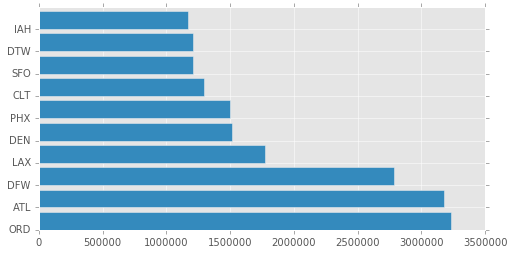

In [43]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

sf_top = sf_Depart_Delay.topk('num_flights', 10)

airports = np.array(sf_top['Origin'])
avg_delay = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(avg_delay)), avg_delay)

plt.yticks(range(len(airports)), airports)

plt.show()

***Figure 1. Airports with the Highest Number of Departure Delays***

Figure 1 shows the top airports with Departure Delays. Historically, ORD is the airport with the greatest number of departure delays. The total number of departure delays for ORD was a little over 3 million from the years 1987 to 2008. ORD (O'Hare International Airport) is located in Chicago, Illinois. The second highest is ATL with almost the same amount of delays and the third is the DFW Airport. These three airports have a significantly higher number of airport delays while the other airports have lower amounts of delays in comparison. The top three airports have around 1 million more delays than other airports. 

### Question 1.2: Destination/Arrival Delay

Here, we are doing the same analysis, but for Arrival Delays. The Arrival Delays less than zero are excluded from the new data frame. The only change in the groupby statement is that we are now focusing on Destination.

In [45]:
import graphlab as gl

In [46]:
sf = gl.load_sframe('Data/sframe_Directory')

In [47]:
# Only select rows that have a delay
sf = sf[sf.apply(lambda x: x['ArrDelay'] > 0)] 

%time sf_Arrival_Delay = sf.groupby('Dest', {'Avg_ArrDelay':gl.aggregate.AVG('ArrDelay'),'delay_max':gl.aggregate.MAX('ArrDelay'),'num_flights':gl.aggregate.COUNT()})

sf_Arrival_Delay.sort(['Avg_ArrDelay', 'delay_max', 'num_flights'], ascending = False)
#sf_Depart_Delay.sort('delay_max', ascending = False)

CPU times: user 14min 4s, sys: 38.9 s, total: 14min 43s
Wall time: 13min 32s


Dest,Avg_ArrDelay,delay_max,num_flights
MQT,58.0653479336,1211,2831
ACK,45.85,417,980
SPI,45.7450980392,757,2397
ILG,45.6432160804,385,398
HHH,44.4306976744,386,1075
LMT,42.7481203008,219,266
MCN,42.0382978723,453,3525
SOP,40.3773584906,329,212
EWN,39.5523978686,279,563
OTH,38.8739726027,292,365


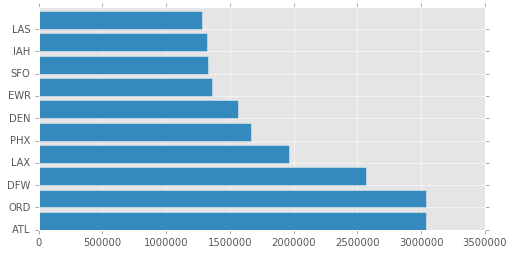

In [48]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

sf_top = sf_Arrival_Delay.topk('num_flights', 10)

airports = np.array(sf_top['Dest'])
avg_delay = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(avg_delay)), avg_delay)

plt.yticks(range(len(airports)), airports)

plt.show()

***Figure 2. Airports with the Highest Number of Arrival Delays***

Historically, ATL is the airport with the greatest number of arrival delays. The total number of arrival delays for ATL was just over 3 million. ATL (Hartsfield–Jackson Atlanta International Airport) is located in Altanta, Georgia. The other top two are ORD and DFW. These were the same top three airports we saw in the Departure Delay analysis. We can say that overall, ORD, ATL and DFW have the highest number of flight delays, both inbound and outbound.

### Question 2.1: Origin/Destination Departure Delay for Origin/Destination Pairs

The second question looks at which flights (origin/destination pairs) are most likely going to be delayed. We are going to look at the Departure and Arrival Delays separately once more. First, we are going to reload the data and remove flights with Departure Delays that are less than zero. Once they are removed, the remaining data will be used for our analysis. Now, we are doing a group by based on Origin and Destination. The Average Departure Delay and maximum delay is calculated as well. The count of the number of flights is also given. 

In [49]:
import graphlab as gl

In [54]:
sf = gl.load_sframe('Data/sframe_Directory')

In [55]:
# Only select rows that have a delay
sf = sf[sf.apply(lambda x: x['DepDelay'] > 0)] 

%time sf_Origin_Depart = sf.groupby(['Origin', 'Dest'], {'Avg_DepDelay':gl.aggregate.AVG('DepDelay'),'delay_max':gl.aggregate.MAX('DepDelay'),'num_flights':gl.aggregate.COUNT()})

CPU times: user 12min 40s, sys: 33.3 s, total: 13min 14s
Wall time: 12min 44s


In [56]:
sf_Origin_Depart.sort(['num_flights'], ascending = False)

Dest,Origin,delay_max,num_flights,Avg_DepDelay
SFO,LAX,1401,159475,24.0182473742
LAX,SFO,1320,141722,22.9409266028
LAX,PHX,1320,128549,21.5099145073
PHX,LAX,738,126440,21.538895919
LAS,LAX,1145,124133,21.3920391838
LAX,LAS,1434,121019,21.6737454449
LAX,ORD,1344,109375,22.4414537143
LAS,PHX,694,106578,21.6913809604
LGA,ORD,1076,106007,25.0880507891
DFW,ATL,1411,101589,19.7609682151


#### Validation

In [58]:
sf_filter = sf[sf.apply(lambda x: True if (x['Origin'] == 'LAX' and x['Dest'] == 'SFO') else False)]

In [60]:
sf_filter.shape

(159475, 29)

The num_flights value from the table was Origin = 'LAX' and Dest = 'SFO' = 159475. This is the same number of records we receive when we filter direclty from the full dataset.

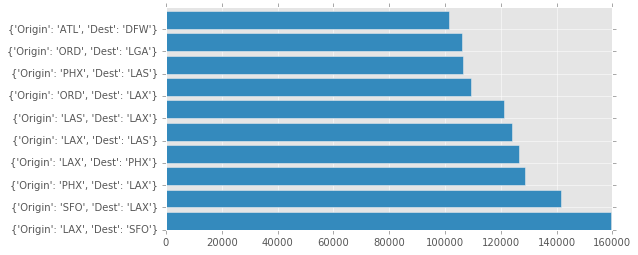

In [62]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

sf_top = sf_Origin_Depart.topk('num_flights', 10)

airports = np.array(sf_top['Origin','Dest'])
avg_delay = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(avg_delay)), avg_delay)

plt.yticks(range(len(airports)), airports)

plt.show()

***Figure 3. Origin Destinaton Pairs with the Highest Number of Departure Delays***

Figure 3 shows the top Origin/Destination Pairs with the highest number of Departure Delays. Historically, the flight from LAX (Los Angeles International Airport) to SFO (San Francisco International Airport) is the flight with the greatest number of departure delays. The total number of departure delays for LAX to SFO flight is 159,475. LAX to SFO both ways are the top two pairs with the highest delays. PHX to LAX is the next highest. LAX is in many of the pairs in this chart. The average departure delay from LAX to SFO is about 23 minutes.

### Question 2.2: Origin/Destination Arrival Delay for Origin/Destination Pairs

In [63]:
import graphlab as gl

In [64]:
sf = gl.load_sframe('Data/sframe_Directory')

In [65]:
# Only select rows that have a delay
sf = sf[sf.apply(lambda x: x['ArrDelay'] > 0)] 

%time sf_Origin_Depart = sf.groupby(['Origin', 'Dest'], {'Avg_ArrDelay':gl.aggregate.AVG('ArrDelay'),'delay_max':gl.aggregate.MAX('ArrDelay'),'num_flights':gl.aggregate.COUNT()})

CPU times: user 25min 42s, sys: 1min 35s, total: 27min 18s
Wall time: 1h 1min 48s


In [66]:
sf_Origin_Depart.sort(['num_flights'], ascending = False)

Dest,Origin,Avg_ArrDelay,delay_max,num_flights
LAX,SFO,23.638234168,732,159313
SFO,LAX,28.6890135892,693,154682
LAX,PHX,20.5285087421,460,147218
LAS,LAX,19.9354702542,1189,146878
LAX,LAS,21.1059119204,1025,146027
PHX,LAX,20.0918682377,727,141224
LAS,PHX,19.4132414321,684,130575
PHX,LAS,20.3223645991,772,120494
LGA,ORD,33.1686112913,1057,109447
MSP,ORD,26.4216118758,978,109264


#### Validation

In [68]:
sf_filter = sf[sf.apply(lambda x: True if (x['Origin'] == 'SFO' and x['Dest'] == 'LAX') else False)]

In [69]:
sf_filter.shape

(159313, 29)

The num_flights value from the table was Origin = 'SFO' and Dest = 'LAX' = 159313. This is the same number of records we receive when we filter direclty from the full dataset.

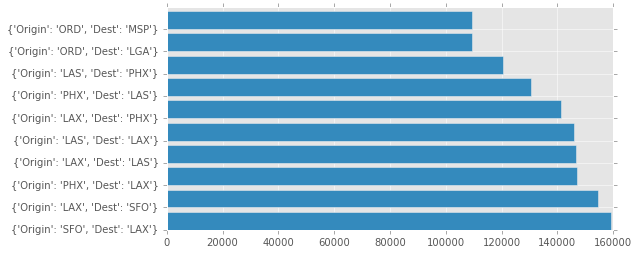

In [67]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

sf_top = sf_Origin_Depart.topk('num_flights', 10)

airports = np.array(sf_top['Origin','Dest'])
avg_delay = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(avg_delay)), avg_delay)

plt.yticks(range(len(airports)), airports)

plt.show()

***Figure 4. Origin Destinaton Pairs with the Highest Number of Arrival Delays***

Figure 4 shows the origin destination pairs with the highest number of Arrival Delays. Historically, the flight from SFO (San Francisco International Airport) to LAX (Los Angeles International Airport) is the flight with the greatest number of arrival delays. The average arrival delay in minutes is about 29 minutes from SFO to LAX.

### Question 3: Linear Regression to Predict Length of Delays

The final use case discussed will be the ability to determine the length of a flight delay before it is delayed. We will use Linear Regression to accomplish this task. We'll continue to use graphlab for this section as well. The most important variables that may affect the length of the delay are the following:

1. DepDelay
2. DayOfWeek
3. Origin
4. Dest
5. Distance
6. UniqueCarrier
7. CarrierDelay
8. WeatherDelay
9. NASDelay
10. SecurityDelay
11. LateAircraftDelay

These are the variables we will use as features in our regression model. Additionally, we will be creating two features based on the ones we already have. These are categorical variables for time. DepTimeCategory creates four categories of the time of the day the flight departed (Morning, Afternoon, Evening and Night). A similar variable is created for flight arrival times. Numbers are assigned for each category. Other categorical variables (Origin, Dest, UniqueCarrier) also have numbers for the categories they have. These features will be regressed to predict Departure Delay.

In [1]:
import graphlab as gl
import pandas as pd

In [2]:
sf = gl.load_sframe('Data/sframe_Directory')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492668553.log


This non-commercial license of GraphLab Create for academic use is assigned to jdalal@smu.edu and will expire on April 18, 2018.


##### Variable 1: DepTimeCategory

Morning: 1
Afternoon: 2
Evening : 3
Night : 4

In [3]:
sf['DepTimeByHour'] = sf['CRSDepTime'].apply(lambda x: (x / 100))

In [4]:
sf['DepTimeCategory'] = sf['DepTimeByHour'].apply(lambda x: 1 if(5 <= x <= 11) else (2 if(12 <= x <= 16) else (3 if(17 <= x <= 21) else (4))))

##### Variable 2: ArrTimeCategory

Morning: 1
Afternoon: 2
Evening : 3
Night : 4

In [5]:
sf['ArrTimeByHour'] = sf['CRSArrTime'].apply(lambda x: (x / 100))

In [6]:
sf['ArrTimeCategory'] = sf['ArrTimeByHour'].apply(lambda x: 1 if(5 <= x <= 11) else (2 if(12 <= x <= 16) else (3 if(17 <= x <= 21) else (4))))

#### Categorical Variables: Origin, Dest, Unique Carrier

In [7]:
sf['Origin'] = pd.factorize(sf['Origin'])[0]
sf['Dest'] = pd.factorize(sf['Dest'])[0]
sf['UniqueCarrier'] = pd.factorize(sf['UniqueCarrier'])[0]

In [8]:
sf['Origin'].unique()
sf['Dest'].unique()
sf['UniqueCarrier'].unique()

dtype: int
Rows: 29
[0, 16, 23, 10, 18, 26, 14, 12, 3, 1, 6, 11, 25, 27, 13, 24, 2, 8, 15, 28, 20, 19, 5, 4, 21, 22, 9, 7, 17]

Now, we're creating a dataframe with just the features we will need for the regression to make the process more efficient. We're also splitting the data into a training/testing sets.

In [9]:
sf_new = sf['ArrDelay', 'DepDelay', 'DayOfWeek', 'Origin', 'Dest', 'Distance', 'UniqueCarrier', 'DepTimeCategory', 'ArrTimeCategory'].dropna()


To check our assumptions before running the regression model, we looked at histograms and scatterplots using graphlab's canvas tool. Overall, the data looks fairly normally distributed and the scatterplots do not indicate any significant multicollinearity. However did see a slight correlation between ArrDelay and DepDelay. This makes sense because the Departure Delay could affect the Arrival Delay. We will see this in our regression model as well.

In [10]:
sf_new.show(view="Heat Map", x="ArrDelay", y="DepDelay")

Canvas is accessible via web browser at the URL: http://localhost:51371/index.html
Opening Canvas in default web browser.


In [14]:
train_data, test_data = sf_new.random_split(0.8)

#### Regression Model

Here, we're running the regression model on our training data set containing the eight selected features. The training and testing sets' maximum error and root mean squared errors are given below. For the training data, the maximum error is approximately 1508 and the RMSE is 14. The coefficients and their standard errors are also printed below.

In [15]:
%time lin_model = gl.linear_regression.create(train_data, target='DepDelay', features=['ArrDelay', 'DayOfWeek', 'Origin', 'Dest', 'Distance', 'UniqueCarrier', 'DepTimeCategory', 'ArrTimeCategory'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 91770507

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 13.013836    | 1508.467773        | 1449.468514          | 13.823562     | 13.730967       |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

CPU times: user 10min 57s, sys: 15.1 s, total: 11min 12s
Wall time: 1min 38s


SUCCESS: Optimal solution found.

In [16]:
lin_model['coefficients']

name,index,value,stderr
(intercept),None,-0.510247130983,0.00611475193996
ArrDelay,None,0.799344685326,4.72128742316e-05
DayOfWeek,None,0.18299063019,0.00072484256089
Origin,None,-0.00218284342292,3.544192911e-05
Dest,None,0.000316871921073,3.53124231985e-05
Distance,None,0.000981413208607,2.7659928674e-06
UniqueCarrier,None,-0.0276586034397,0.000258419778194
DepTimeCategory,None,0.250349652188,0.00273984201368
ArrTimeCategory,None,0.653696064835,0.00254352405392


The above table shows all the coefficient values that went into the creation of the delay prediction model. Not surprisingly the most weighted coefficients are Arrival Delay and Arrival Time Category. Since we are trying to predict Departure Delay, it makes sense that Arrival Delay and time would be significant factors. The most influential variables seem to be DepTimeCategory (what time of day the flight will depart). Further analysis will tell us which time of day will have the most delays). Day of the Week is significant as well. Certain days may be busier at airports and could cause delays.

The section below calculates the predictions and stores them in a new vector. The maximum error and RMSE are calculated for the testing data set to see how well our model predicts Departure Delay. Notice that the maximum error is slightly lower than the training set's. The RMSE almost the same as the training set's. The RMSE is the square root of the variance of the residuals. It is a good indicator of the model's fit along with the F-test and R-Squared value. The lower the RMSE, the better the fit will be. In our case, the RMSE is fairly low. However, we would need to compare with other models to understand that better.

In [18]:
predictions = lin_model.predict(test_data)

In [21]:
results = lin_model.evaluate(test_data)
results

{'max_error': 1456.2400227459564, 'rmse': 13.757072021566177}

## CONCLUSIONS

Airline delays are an on-going problem in any major airport around the world. It is expensive to both the airline companies as well as passengers. As a result of this analysis, we've determined several factors affecting airline delays. When we looked at top airports with Departure and Arrival Delays, we saw ATL, ORD and DFW for both types of delays. When looking at the Origin/Destination pairs that had the most delays, we saw that LAX to SFO both directions had the highest delays based on the historical data. Using several features for regression to predict Departure Delays, the most weighted weighted coefficients were both associated with arrival features. These were actual arrival time and arrival delay. Overall the model did seem like a good fit based on the RMSE. However, to solidify this analysis we would need to create models and compare the RMSE's. We should also perform an F-Test for overall fit and look at the R-Squared values for each model. Perhaps breaking down the above model into smaller models (using a subset of the features we used) may help us determine which model has the best fit. Overall, using Python for the majority of this assignment proved to be more powerful because of its fast parsing capabilities. 

## REFERENCES

1. Code: http://stat-computing.org/dataexpo/2009/the-data.html & Jupyter Notebook provided in class.
2. https://turi.com/products/create/docs/graphlab.toolkits.regression.html
3. Nolan, D., & Lang, D. T. (2015). Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. Retrieved April 12, 2017.
